## 데이터 분석 결과 요약

* **수치형 칼럼 (두께, 길이)**:
    * 균일한 분포를 보입니다.
* **카테고리형 칼럼**:
    * 파이 차트를 통해 시각적으로 정리했습니다.
* **drug_shape (제형)**:
    * 분포가 균일하지 않으므로, 모델 설계 시 이 점을 고려해야 합니다.

* 모델 상업활용 방안
    * 노인이나 시각장애인경우 처방 받은후에도 기억하지 못하는 경우, 약품을 식별하여 안내메세지를 음성으로 출력할수있습니다
    * 비전문가인 일반인도 쉽게 부작용을 등록하여 공유하고, 회사도 피드백을 받을수 있습니다. 부작용을 개개인마다 다르고, 임상테스트랑 또 다른 케이스를 찾을수 있습니다.
    * 비전문가인 일반인도 쉽게 생애 복약이력을 기록하고, 복잡한 의료정보시스템을 거치지않고 저장/확인 할수있습니다.
    * 약국, 병원, 온라인 쇼핑몰 등에서 약품 정보 검색을 위한 API를 제공하여 활용도를 높일 수 있습니다.
    * 원격 의료/복약 지도: 원격 의료 상담 시 환자가 복용하는 약품을 정확하게 식별하고 복약 지도를 제공하는 서비스를 개발할 수 있습니다.


* 데이터 상업활용 방안 
    * 약품 시장점유율 고려한 신규진입:
        * 소량판매도 너그러운 시장- 소화성궤양용제, 동맥경화용제, 정신경용제
        * 균형있는 시장- 해열.진통.소염제, 중추신경제, 혈압강화제
        * 반독점 형태로 진입불가- 항전간제, 순환제, 진해거담제, 비뇨생식,항문용, 혼합비타민, 
        * 진입은 가능하나 3, 2점유 체제- 당뇨, 제산제

	* 약품 디자인 및 마케팅:
	    * 약품 디자인 트렌드, 시장 점유율 파악하고, 신제품 개발 또는 마케팅 전략 수립에 활용할 수 있습니다.

# 환경세팅

In [2]:
import os
import sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [ ]:
### 개발환경 세팅하기

# # ▶ 한글 폰트 다운로드 -  Google Colab에서 sudo 명령어를 실행할 때는 비밀번호를 입력할 수 없지만, 뒷부분코드는 한글 폰트 설정 코드는 환경에서 작동합니다
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# ▶ 한글 폰트 설정하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')


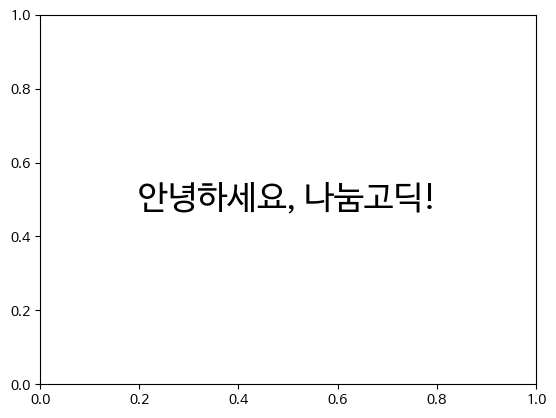

In [2]:
import matplotlib.font_manager as fm

# # 나눔고딕 폰트를 설치합니다.
# !apt-get install -y fonts-nanum
# !fc-cache -fv

# # 설치된 나눔고딕 폰트를 matplotlib에 등록합니다.
# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# fm.fontManager.addfont(font_path)
# plt.rcParams['font.family'] = 'NanumGothic'

# 폰트가 잘 설정되었는지 테스트합니다.
plt.text(0.5, 0.5, '안녕하세요, 나눔고딕!', ha='center', va='center', size=24)
plt.show()

In [4]:
train_annots_dir = "../data/train_annotations" 
train_annots = sorted([f for f in os.listdir(train_annots_dir) if f.endswith(".json")])

NameError: name 'os' is not defined

In [5]:
import pandas as pd
import json
import os

def process_json_files(folder_path):
    """폴더 안의 JSON 파일을 읽어 데이터프레임을 생성합니다."""
    data = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".json"):
                file_path = os.path.join(root, file)
                try:
                    with open(file_path, "r", encoding="utf-8") as f:
                        json_data = json.load(f)
                        if "images" in json_data and len(json_data["images"]) > 0:
                            image_data = json_data["images"][0]
                            annotation_data = json_data["annotations"][0] if "annotations" in json_data and len(json_data["annotations"]) > 0 else {}
                            category_data = json_data["categories"][0] if "categories" in json_data and len(json_data["categories"]) > 0 else {}

                            record = {
                                "supercategory": category_data.get("supercategory"),
                                "category_id": category_data.get("id"),
                                "category_name": category_data.get("name"),
                                "file_path": file_path,
                                "file_name": image_data.get("file_name"),
                                "width": image_data.get("width"),
                                "height": image_data.get("height"),
                                "drug_N": image_data.get("drug_N"),
                                "drug_S": image_data.get("drug_S"),
                                "back_color": image_data.get("back_color"),
                                "drug_dir": image_data.get("drug_dir"),
                                "light_color": image_data.get("light_color"),
                                "camera_la": image_data.get("camera_la"),
                                "camera_lo": image_data.get("camera_lo"),
                                "size": image_data.get("size"),
                                "dl_idx": image_data.get("dl_idx"),
                                "dl_mapping_code": image_data.get("dl_mapping_code"),
                                "dl_name": image_data.get("dl_name"),
                                "dl_name_en": image_data.get("dl_name_en"),
                                "img_key": image_data.get("img_key"),
                                "dl_material": image_data.get("dl_material"),
                                "dl_material_en": image_data.get("dl_material_en"),
                                "dl_custom_shape": image_data.get("dl_custom_shape"),
                                "dl_company": image_data.get("dl_company"),
                                "dl_company_en": image_data.get("dl_company_en"),
                                "item_seq": image_data.get("item_seq"),
                                "di_item_permit_date": image_data.get("di_item_permit_date"),
                                "di_class_no": image_data.get("di_class_no"),
                                "di_etc_otc_code": image_data.get("di_etc_otc_code"),
                                "di_edi_code": image_data.get("di_edi_code"),
                                "chart": image_data.get("chart"),
                                "drug_shape": image_data.get("drug_shape"),
                                "thick": image_data.get("thick"),
                                "leng_long": image_data.get("leng_long"),
                                "leng_short": image_data.get("leng_short"),
                                "print_front": image_data.get("print_front"),
                                "print_back": image_data.get("print_back"),
                                "color_class1": image_data.get("color_class1"),
                                "color_class2": image_data.get("color_class2"),
                                "line_front": image_data.get("line_front"),
                                "line_back": image_data.get("line_back"),
                                "img_regist_ts": image_data.get("img_regist_ts"),
                                "form_code_name": image_data.get("form_code_name"),
                                "mark_code_front_anal": image_data.get("mark_code_front_anal"),
                                "mark_code_back_anal": image_data.get("mark_code_back_anal"),
                                "mark_code_front_img": image_data.get("mark_code_front_img"),
                                "mark_code_back_img": image_data.get("mark_code_back_img"),
                                "mark_code_front": image_data.get("mark_code_front"),
                                "mark_code_back": image_data.get("mark_code_back"),
                                "change_date": image_data.get("change_date"),
                                "id": image_data.get("id"),
                                "area": annotation_data.get("area"),
                                "iscrowd": annotation_data.get("iscrowd"),
                                "bbox": annotation_data.get("bbox"),
                                "category_id": annotation_data.get("category_id"),
                                "ignore": annotation_data.get("ignore"),
                                "segmentation": annotation_data.get("segmentation"),
                                "annotation_id": annotation_data.get("id"),
                                "image_id": annotation_data.get("image_id"),
                            }
                            data.append(record)
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

    df = pd.DataFrame(data)
    return df

# JSON 파일이 있는 폴더 경로를 지정하세요.
folder_path = train_annots_dir  # 실제 폴더 경로로 변경
df = process_json_files(folder_path)
df.head() # 데이터프레임의 첫 5개 행을 출력하여 변경사항 확인

,supercategory,category_id,category_name,file_path,file_name,width,height,drug_N,drug_S,back_color,...,mark_code_back,change_date,id,area,iscrowd,bbox,ignore,segmentation,annotation_id,image_id
0,pill,27776,카나브정 60mg,../data/train_annotations/K-003483-025367-0277...,K-003483-025367-027777-035206_0_2_0_2_75_000_2...,976,1280,K-027777,정상알약,연회색 배경,...,,20210309,29,37080,0,"[145, 775, 180, 206]",0,[],111,29
1,pill,27776,카나브정 60mg,../data/train_annotations/K-003483-025367-0277...,K-003483-025367-027777-035206_0_2_0_2_70_000_2...,976,1280,K-027777,정상알약,연회색 배경,...,,20210309,30,34692,0,"[638, 293, 177, 196]",0,[],109,30
2,pill,27776,카나브정 60mg,../data/train_annotations/K-003483-025367-0277...,K-003483-025367-027777-035206_0_2_0_2_90_000_2...,976,1280,K-027777,정상알약,연회색 배경,...,,20210309,28,35223,0,"[176, 812, 177, 199]",0,[],110,28
3,pill,25366,자누메트정 50/850mg,../data/train_annotations/K-003483-025367-0277...,K-003483-025367-027777-035206_0_2_0_2_75_000_2...,976,1280,K-025367,정상알약,연회색 배경,...,,20181112,29,178253,0,"[9, 49, 397, 449]",0,[],945,29
4,pill,25366,자누메트정 50/850mg,../data/train_annotations/K-003483-025367-0277...,K-003483-025367-027777-035206_0_2_0_2_70_000_2...,976,1280,K-025367,정상알약,연회색 배경,...,,20181112,30,196729,0,"[566, 726, 409, 481]",0,[],105,30


In [6]:
import json
import os
import re
import pandas as pd

def analyze_json_files(folder_path):
    """주어진 폴더의 JSON 파일을 분석하여 알약 개수와 어노테이션 개수를 비교합니다."""
    analysis_results = []

    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            filepath = os.path.join(folder_path, filename)
            with open(filepath, 'r') as f:
                data = json.load(f)

            # 파일 이름에서 알약 번호 추출
            pill_numbers = re.findall(r'\d{6}', filename)
            expected_pill_count = len(pill_numbers)

            # 어노테이션 개수 확인
            actual_annotation_count = len(data['annotations'])

            analysis_results.append({
                'filename': filename,
                'expected_pill_count': expected_pill_count,
                'actual_annotation_count': actual_annotation_count
            })

    return pd.DataFrame(analysis_results)

# JSON 파일이 있는 폴더 경로를 지정하세요.
folder_path = "../data/train_annots_modify"
results_df = analyze_json_files(folder_path)

# 차이 계산
results_df['difference'] = results_df['expected_pill_count'] - results_df['actual_annotation_count']

# 불일치 레코드만 출력
mismatch_df = results_df[results_df['difference'] != 0]
print("불일치 레코드:")
mismatch_df

불일치 레코드:


,filename,expected_pill_count,actual_annotation_count,difference
477,K-003544-004543-016548-023203_0_2_0_2_90_000_2...,4,3,1


In [7]:
df.isna().sum().sort_values(ascending=False)  # 결측치 확인 >> 많지않다고 판단했습니다. 172 / 1479

mark_code_back_anal     172
mark_code_front_img     172
print_front             172
print_back              172
color_class1            172
color_class2            172
line_front              172
img_key                 172
line_back               172
img_regist_ts           172
form_code_name          172
mark_code_front_anal    172
chart                   172
drug_shape              172
mark_code_back_img      172
mark_code_front         172
mark_code_back          172
change_date             172
id                        0
area                      0
iscrowd                   0
bbox                      0
ignore                    0
segmentation              0
annotation_id             0
leng_short                0
leng_long                 0
thick                     0
supercategory             0
di_edi_code               0
category_id               0
di_etc_otc_code           0
category_name             0
file_path                 0
file_name                 0
width               

In [6]:
df[:3]

,supercategory,category_id,category_name,file_path,file_name,width,height,drug_N,drug_S,back_color,...,mark_code_back,change_date,id,area,iscrowd,bbox,ignore,segmentation,annotation_id,image_id
0,pill,27776,카나브정 60mg,../data/train_annotations/K-003483-025367-0277...,K-003483-025367-027777-035206_0_2_0_2_75_000_2...,976,1280,K-027777,정상알약,연회색 배경,...,,20210309,29,37080,0,"[145, 775, 180, 206]",0,[],111,29
1,pill,27776,카나브정 60mg,../data/train_annotations/K-003483-025367-0277...,K-003483-025367-027777-035206_0_2_0_2_70_000_2...,976,1280,K-027777,정상알약,연회색 배경,...,,20210309,30,34692,0,"[638, 293, 177, 196]",0,[],109,30
2,pill,27776,카나브정 60mg,../data/train_annotations/K-003483-025367-0277...,K-003483-025367-027777-035206_0_2_0_2_90_000_2...,976,1280,K-027777,정상알약,연회색 배경,...,,20210309,28,35223,0,"[176, 812, 177, 199]",0,[],110,28


def print_dict_first_10(unique_values_dict):
    """딕셔너리의 키와 값(리스트)에 대해 처음 10개 요소만 출력합니다."""
    for key, value in unique_values_dict.items():
        print(f"{key:<{15}}", end=" \t")
        if isinstance(value, list):
            print(f"Value: {value[:10]}")
        else:
            print(f"Value: {value}")


unique_10 = print_dict_first_10(unique_values_dict)
unique_10

In [7]:
columns_to_drop = [
    'drug_S', 'mark_code_back', 'mark_code_front', 'segmentation', 'ignore', 
    'iscrowd', 'mark_code_back_img', 'mark_code_back_anal', 'img_key'
]

df1 = df.drop(columns=columns_to_drop)
df1.columns

Index(['supercategory', 'category_id', 'category_name', 'file_path',
       'file_name', 'width', 'height', 'drug_N', 'back_color', 'drug_dir',
       'light_color', 'camera_la', 'camera_lo', 'size', 'dl_idx',
       'dl_mapping_code', 'dl_name', 'dl_name_en', 'dl_material',
       'dl_material_en', 'dl_custom_shape', 'dl_company', 'dl_company_en',
       'item_seq', 'di_item_permit_date', 'di_class_no', 'di_etc_otc_code',
       'di_edi_code', 'chart', 'drug_shape', 'thick', 'leng_long',
       'leng_short', 'print_front', 'print_back', 'color_class1',
       'color_class2', 'line_front', 'line_back', 'img_regist_ts',
       'form_code_name', 'mark_code_front_anal', 'mark_code_front_img',
       'change_date', 'id', 'area', 'bbox', 'annotation_id', 'image_id'],
      dtype='object')

In [11]:
def get_unique_values_dict(df):
    """데이터프레임의 모든 칼럼에 대해 유니크 값을 딕셔너리로 저장합니다."""
    unique_values_dict = {}
    for column in df.columns:
        # 리스트를 문자열로 변환하여 저장
        unique_values_dict[column] = df[column].astype(str).unique().tolist()
    return unique_values_dict


def print_dict_first_10(dict):
    """딕셔너리의 키와 값(리스트)에 대해 처음 10개 요소만 출력합니다."""
    for key, value in dict.items():
        print(f"{key:<{15}}", end=" \t")
        if isinstance(value, list):
            print(f"Value: {value[:10]}")
        else:
            print(f"Value: {value}")

# unique_values_dict = get_unique_values_dict(df1)
# unique_10 = print_dict_first_10(unique_values_dict)
# unique_10

In [26]:

# unique_values_dict = get_unique_values_dict(df1)
# unique_10 = print_dict_first_10(unique_values_dict)
# unique_10

supercategory   	Value: ['pill']
category_id     	Value: ['27776', '25366', '3482', '35205', '36636', '27732', '28762', '27925', '1899', '24849']
category_name   	Value: ['카나브정 60mg', '자누메트정 50/850mg', '기넥신에프정(은행엽엑스)(수출용)', '아토젯정 10/40mg', '로수젯정10/5밀리그램', '트윈스타정 40/5mg', '트라젠타정(리나글립틴)', '울트라셋이알서방정', '보령부스파정 5mg', '놀텍정 10mg']
file_path       	Value: ['../data/train_annotations/K-003483-025367-027777-035206_json/K-027777/K-003483-025367-027777-035206_0_2_0_2_75_000_200.json', '../data/train_annotations/K-003483-025367-027777-035206_json/K-027777/K-003483-025367-027777-035206_0_2_0_2_70_000_200.json', '../data/train_annotations/K-003483-025367-027777-035206_json/K-027777/K-003483-025367-027777-035206_0_2_0_2_90_000_200.json', '../data/train_annotations/K-003483-025367-027777-035206_json/K-025367/K-003483-025367-027777-035206_0_2_0_2_75_000_200.json', '../data/train_annotations/K-003483-025367-027777-035206_json/K-025367/K-003483-025367-027777-035206_0_2_0_2_70_000_200.json', '../data/trai

In [27]:
df1.columns

Index(['supercategory', 'category_id', 'category_name', 'file_path',
       'file_name', 'width', 'height', 'drug_N', 'back_color', 'drug_dir',
       'light_color', 'camera_la', 'camera_lo', 'size', 'dl_idx',
       'dl_mapping_code', 'dl_name', 'dl_name_en', 'dl_material',
       'dl_material_en', 'dl_custom_shape', 'dl_company', 'dl_company_en',
       'item_seq', 'di_item_permit_date', 'di_class_no', 'di_etc_otc_code',
       'di_edi_code', 'chart', 'drug_shape', 'thick', 'leng_long',
       'leng_short', 'print_front', 'print_back', 'color_class1',
       'color_class2', 'line_front', 'line_back', 'img_regist_ts',
       'form_code_name', 'mark_code_front_anal', 'mark_code_front_img',
       'change_date', 'id', 'area', 'bbox', 'annotation_id', 'image_id'],
      dtype='object')

In [8]:
categorical_cols = df1.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df1.select_dtypes(include=['number']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['supercategory', 'category_name', 'file_path', 'file_name', 'drug_N', 'back_color', 'drug_dir', 'light_color', 'dl_idx', 'dl_mapping_code', 'dl_name', 'dl_name_en', 'dl_material', 'dl_material_en', 'dl_custom_shape', 'dl_company', 'dl_company_en', 'di_item_permit_date', 'di_class_no', 'di_etc_otc_code', 'di_edi_code', 'chart', 'drug_shape', 'print_front', 'print_back', 'color_class1', 'color_class2', 'line_front', 'line_back', 'img_regist_ts', 'form_code_name', 'mark_code_front_anal', 'mark_code_front_img', 'change_date', 'bbox']
Numerical Columns: ['category_id', 'width', 'height', 'camera_la', 'camera_lo', 'size', 'item_seq', 'thick', 'leng_long', 'leng_short', 'id', 'area', 'annotation_id', 'image_id']


# 2.uniques of features

In [12]:

unique_values_dict = get_unique_values_dict(df1[numerical_cols])
unique_10_num = print_dict_first_10(unique_values_dict)
unique_10_num

category_id     	Value: ['27776', '25366', '3482', '35205', '36636', '27732', '28762', '27925', '1899', '24849']
width           	Value: ['976']
height          	Value: ['1280']
camera_la       	Value: ['75', '70', '90']
camera_lo       	Value: ['0']
size            	Value: ['200']
item_seq        	Value: ['201005501', '200901817', '199102014', '201500365', '201503658', '201005081', '201106367', '201006967', '198700706', '200810688']
thick           	Value: ['4.0', '7.0', '3.9', '4.02', '5.0', '3.65', '2.5', '4.28', '5.6', '4.1']
leng_long       	Value: ['8.0', '20.53', '11.1', '17.0', '11.0', '14.0', '8.23', '19.0', '11.4', '19.15']
leng_short      	Value: ['4.0', '10.08', '6.1', '7.0', '6.0', '6.8', '8.23', '9.0', '4.5', '5.8']
id              	Value: ['29', '30', '28', '19', '21', '20', '1', '2', '3', '9']
area            	Value: ['37080', '34692', '35223', '178253', '196729', '195386', '60876', '57681', '57505', '87136']
annotation_id   	Value: ['111', '109', '110', '945', '105', '

In [13]:

unique_values_dict = get_unique_values_dict(df1[categorical_cols])
unique_10_cat = print_dict_first_10(unique_values_dict)
unique_10_cat

supercategory   	Value: ['pill']
category_name   	Value: ['카나브정 60mg', '자누메트정 50/850mg', '기넥신에프정(은행엽엑스)(수출용)', '아토젯정 10/40mg', '로수젯정10/5밀리그램', '트윈스타정 40/5mg', '트라젠타정(리나글립틴)', '울트라셋이알서방정', '보령부스파정 5mg', '놀텍정 10mg']
file_path       	Value: ['../data/train_annotations/K-003483-025367-027777-035206_json/K-027777/K-003483-025367-027777-035206_0_2_0_2_75_000_200.json', '../data/train_annotations/K-003483-025367-027777-035206_json/K-027777/K-003483-025367-027777-035206_0_2_0_2_70_000_200.json', '../data/train_annotations/K-003483-025367-027777-035206_json/K-027777/K-003483-025367-027777-035206_0_2_0_2_90_000_200.json', '../data/train_annotations/K-003483-025367-027777-035206_json/K-025367/K-003483-025367-027777-035206_0_2_0_2_75_000_200.json', '../data/train_annotations/K-003483-025367-027777-035206_json/K-025367/K-003483-025367-027777-035206_0_2_0_2_70_000_200.json', '../data/train_annotations/K-003483-025367-027777-035206_json/K-025367/K-003483-025367-027777-035206_0_2_0_2_90_000_200.json',

In [127]:
# 칼럼분류 수정
categorical_cols =  [
    'category_name', 'drug_N', 'camera_la', 
    'dl_idx', 'dl_mapping_code', 'dl_name', 'dl_material', 'dl_custom_shape', 'dl_company', 
    'di_item_permit_date', 'di_class_no', 'di_etc_otc_code', 'di_edi_code', 'chart', 'drug_shape', 'print_front', 
    'print_back', 'color_class1', 'color_class2', 'line_front', 'line_back', 'img_regist_ts', 'form_code_name', 'mark_code_front_anal', 
    # 'change_date', 'bbox', 'area',
    'back_color', 'light_color', 
    # 'category_id', 'annotation_id', 'image_id','id', 
    ]
numerical_cols =   ['thick', 'leng_long',    'leng_short', ]

## 2.2수치형 features 분포

각 열의 0 값 개수: 결측치입니다
thick: 172
leng_long: 172
leng_short: 172


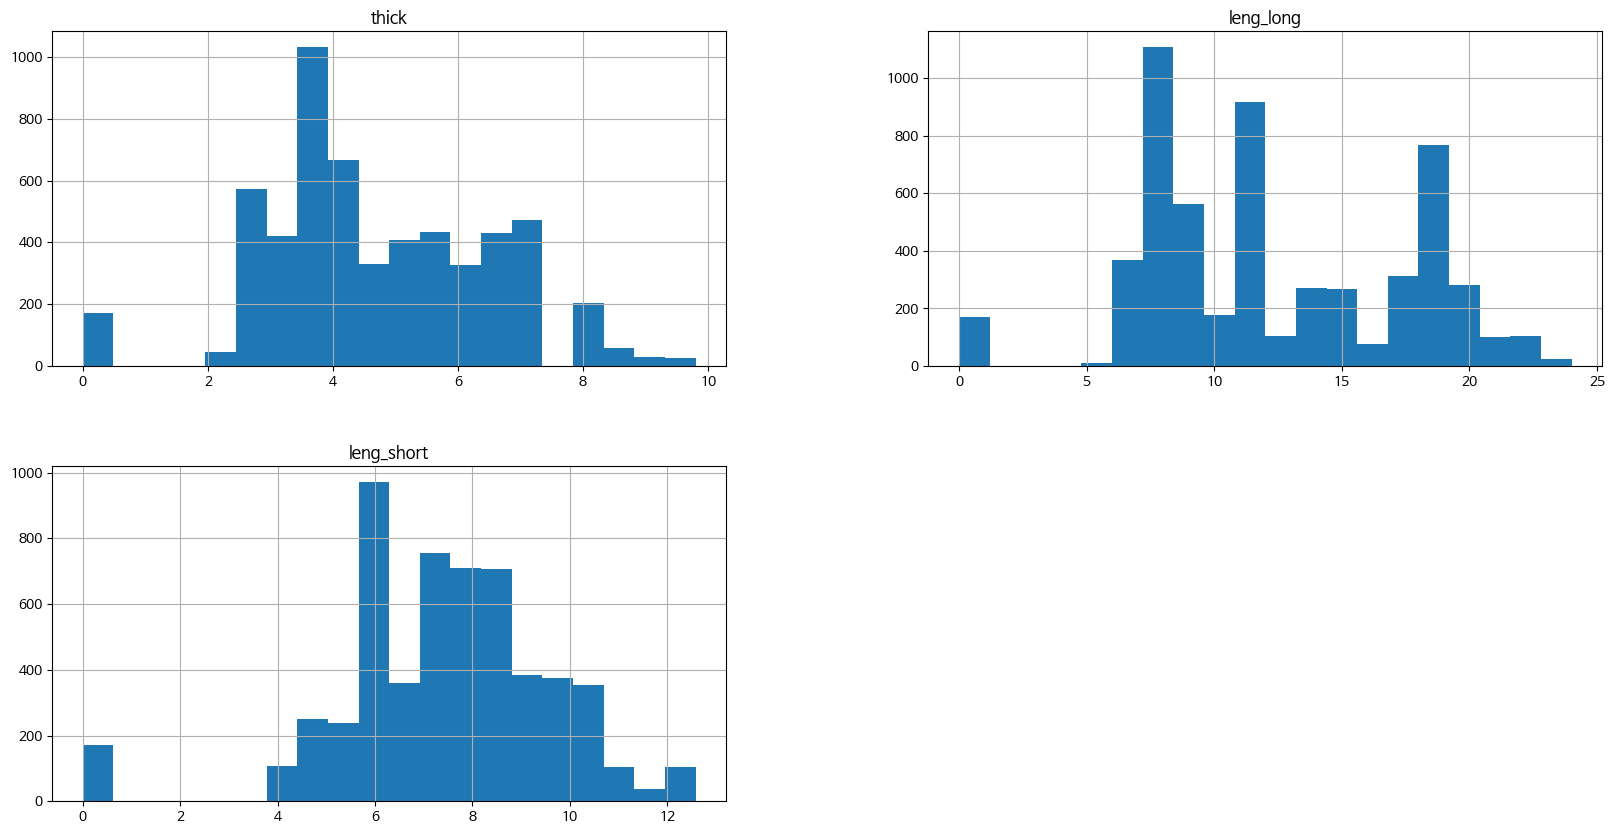

In [ ]:
# df1은 DataFrame이라고 가정합니다.
# numerical_cols는 숫자형 열 이름 목록이라고 가정합니다.

zero_counts = {}  # 각 열의 0 값 개수를 저장할 딕셔너리

for col in numerical_cols:
    zero_counts[col] = (df1[col] == 0).sum()  # 0 값 개수 계산

print("각 열의 0 값 개수: 결측치입니다")
for col, count in zero_counts.items():
    print(f"{col}: {count}")

df1[numerical_cols].hist(figsize=(20, 10), bins=20)
plt.show()

## 2.3카테고리 분포(파이차트)

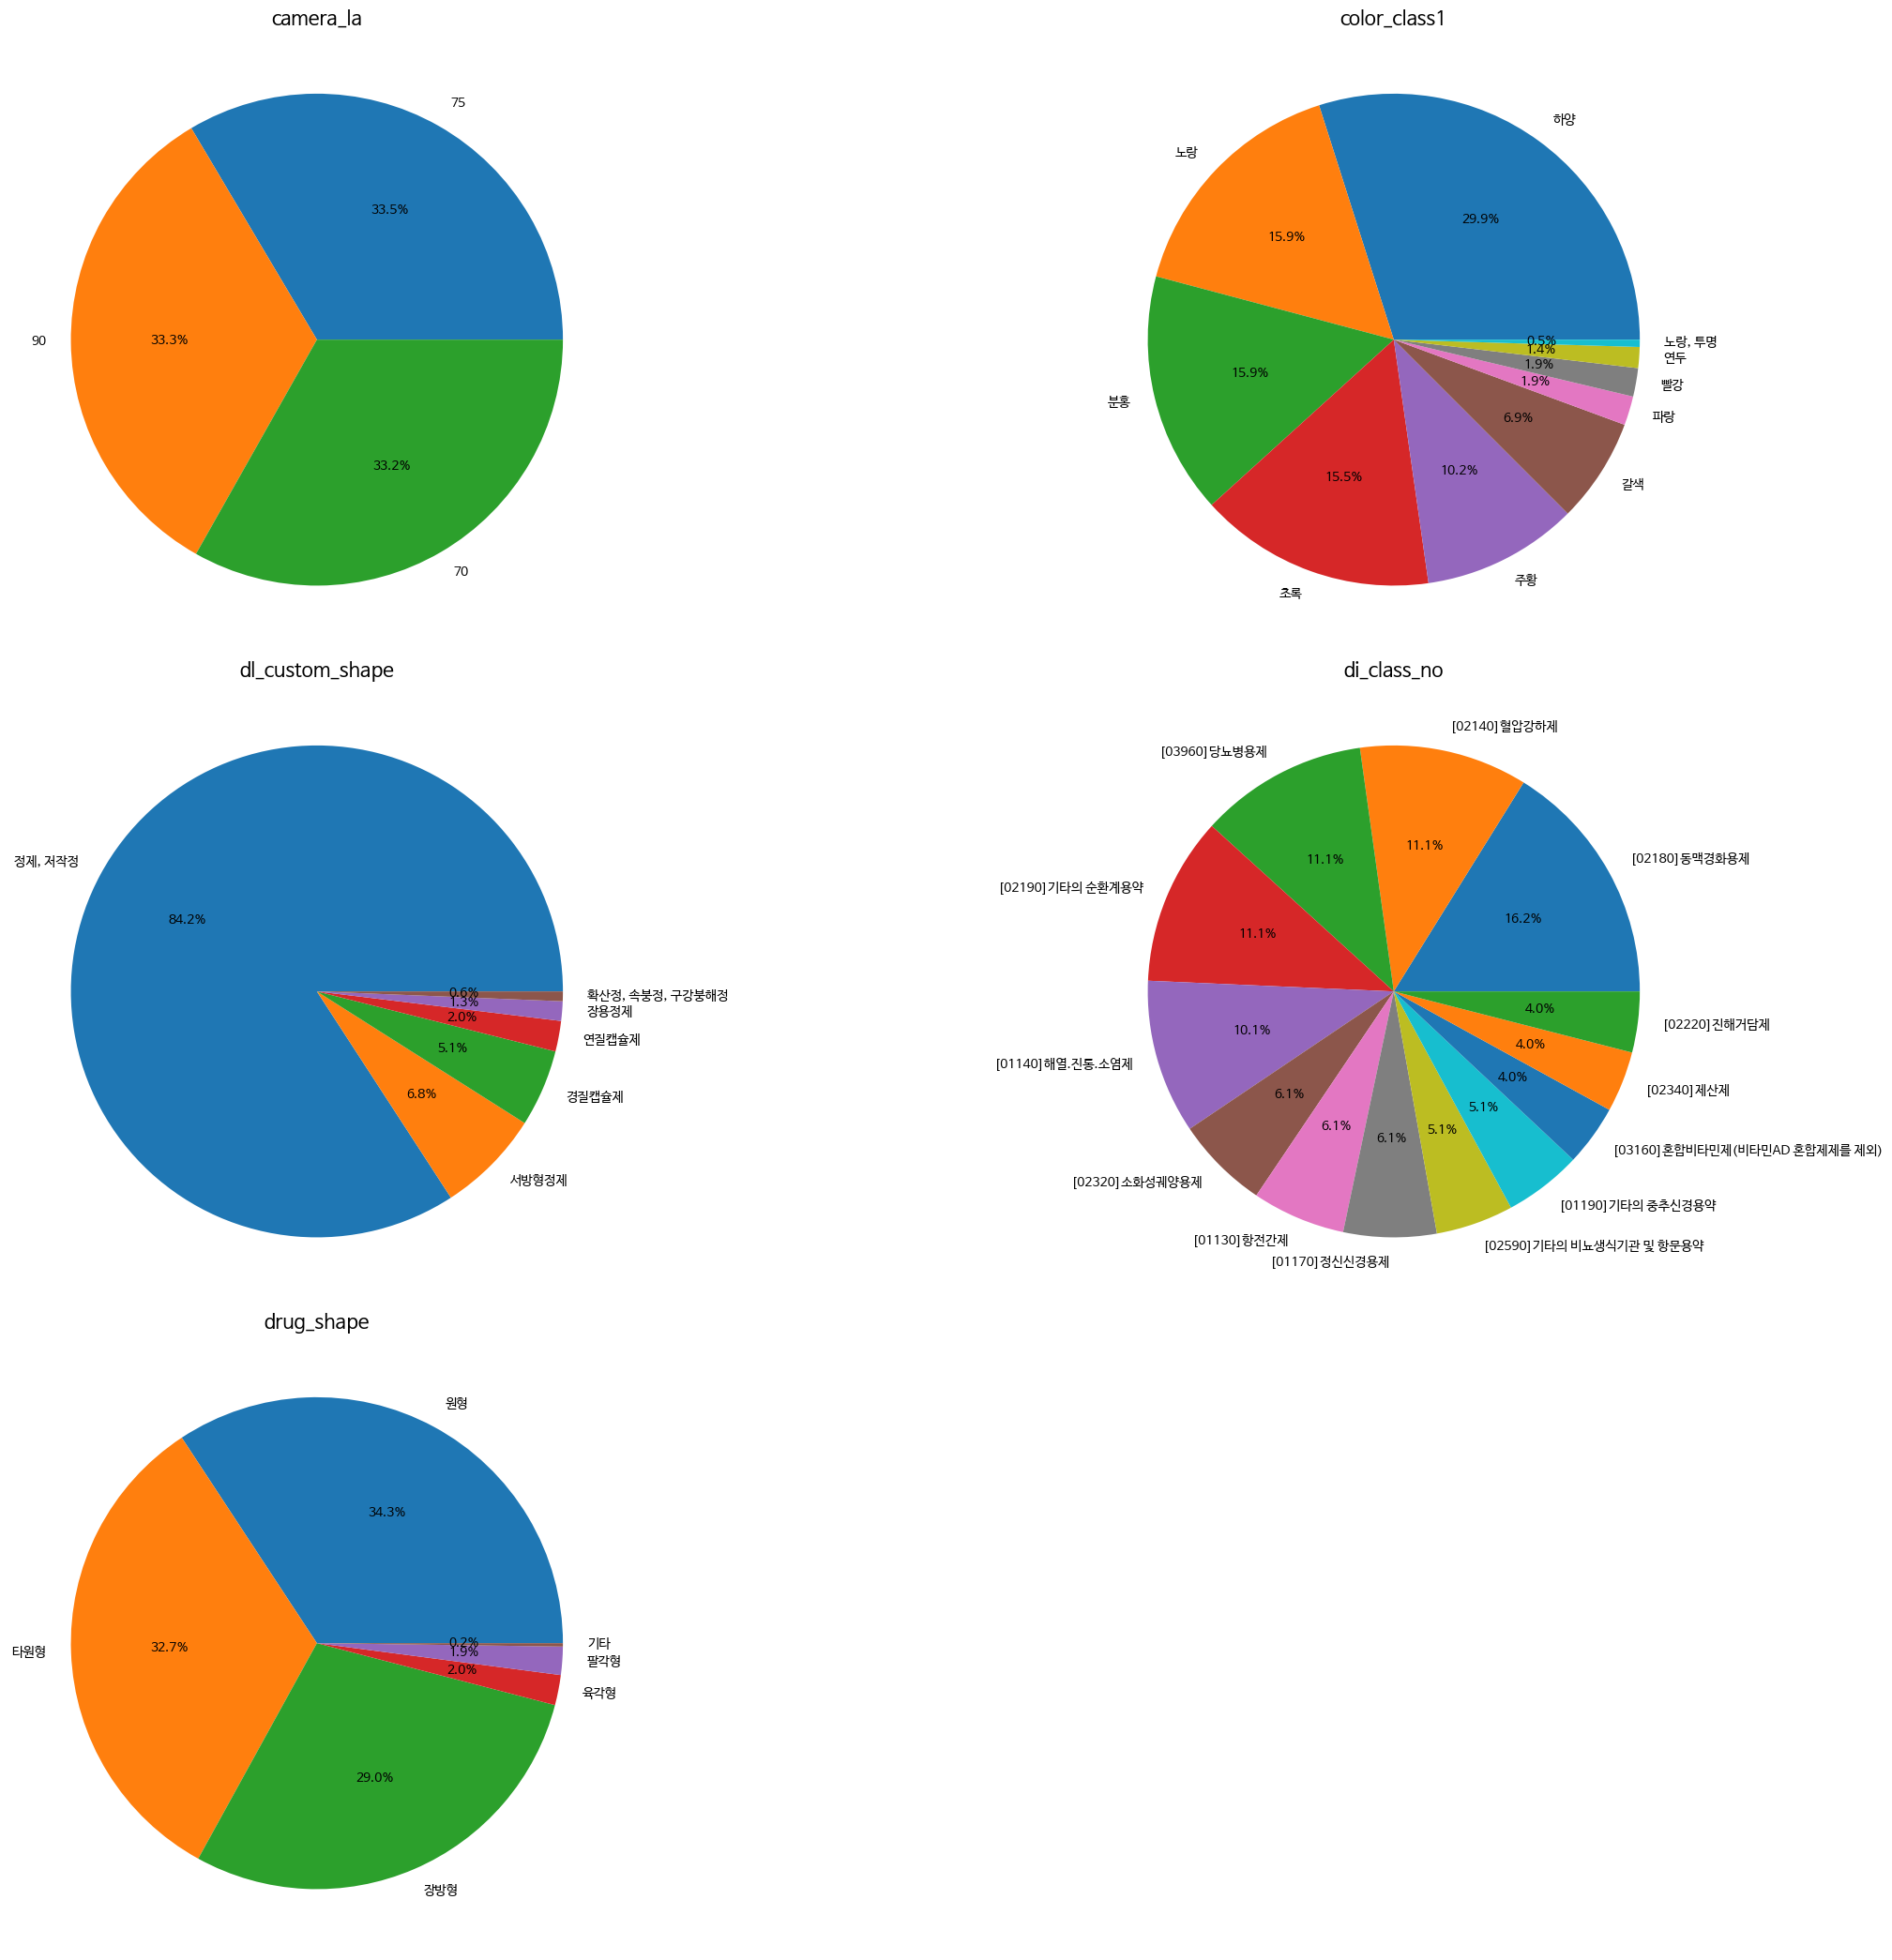

In [116]:
selected_cat_cols = [
    'camera_la', 'color_class1', 'dl_custom_shape',  'di_class_no', 'drug_shape'
]
plot_pie_charts_grid(df1, selected_cat_cols, )

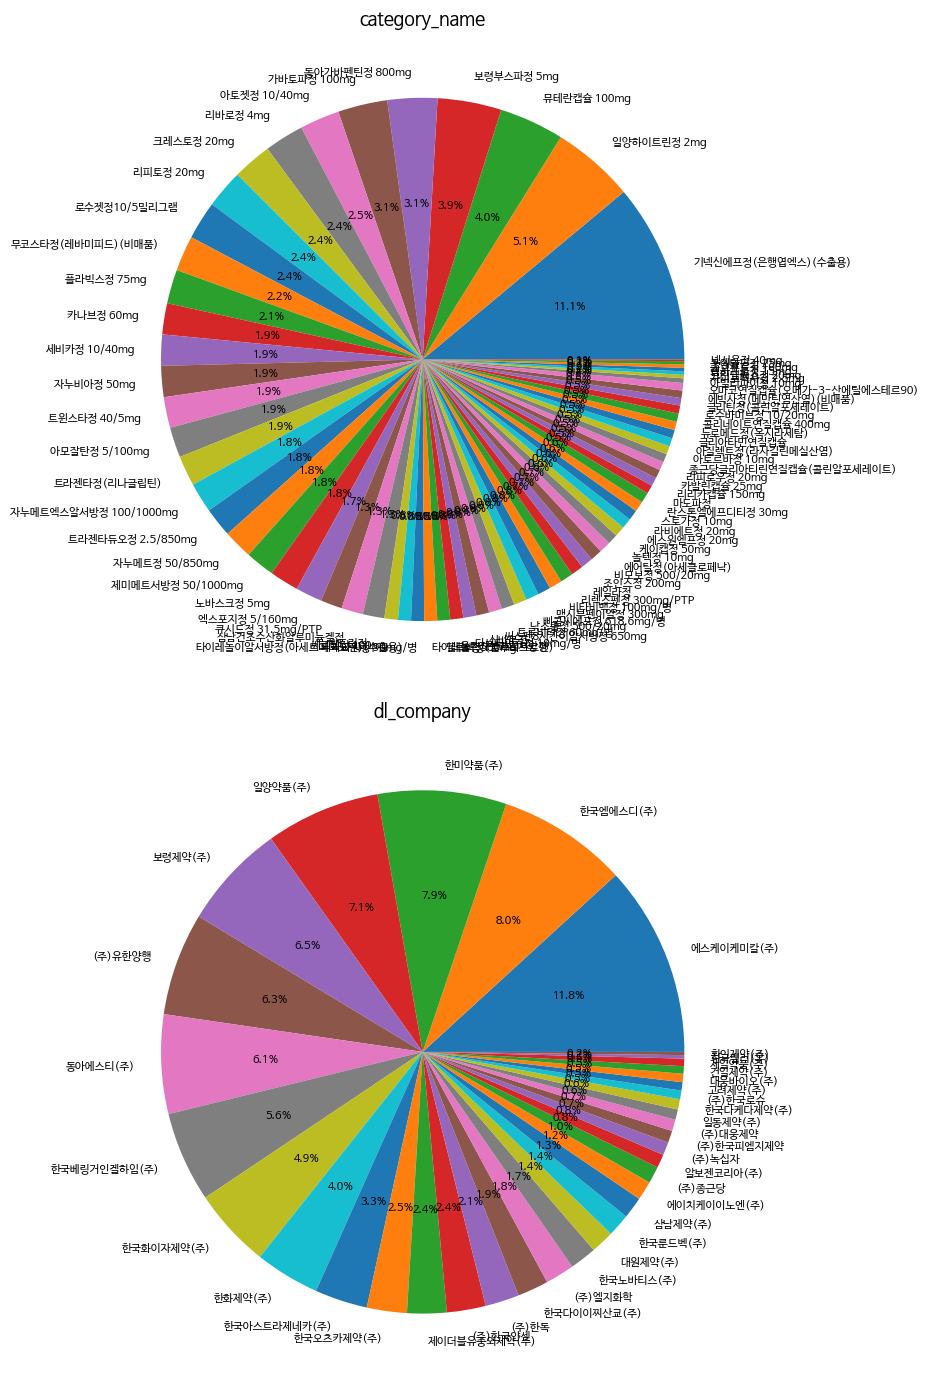

In [83]:
selected_cat_cols2 = [ 'category_name',  'dl_company']
plot_pie_charts_grid(df1, selected_cat_cols2, cols=1, fontsize=8)

# 3.features 간략 설명

* **`category_id`**: 약품 카테고리 ID. Value: \['27776', '25366', '3482', ..., etc]
    * 약품의 종류를 식별하는 고유 ID입니다.
* **`width`**: 이미지 가로 픽셀 수. Value: \['976']
    * 이미지의 가로 크기를 나타냅니다.
* **`height`**: 이미지 세로 픽셀 수. Value: \['1280']
    * 이미지의 세로 크기를 나타냅니다.
* **`camera_la`**: 카메라 각도 (latitude). Value: \['75', '70', '90']
    * 약품을 촬영한 카메라의 수직 각도를 나타냅니다.
* **`camera_lo`**: 카메라 각도 (longitude). Value: \['0']
    * 약품을 촬영한 카메라의 수평 각도를 나타냅니다.
* **`size`**: 이미지 크기. Value: \['200']
    * 이미지의 파일 크기 또는 특정 크기 단위를 나타낼 수 있습니다.
* **`thick`**: 약품 두께. Value: \['4.0', '7.0', '3.9', ..., etc]
    * 약품의 두께를 나타냅니다.
* **`leng_long`**: 약품 긴쪽 길이. Value: \['8.0', '20.53', '11.1', ..., etc]
    * 약품의 가장 긴 길이를 나타냅니다.
* **`leng_short`**: 약품 짧은쪽 길이. Value: \['4.0', '10.08', '6.1', ..., etc]
    * 약품의 가장 짧은 길이를 나타냅니다.
* **`id`**: 이미지 ID. Value: \['29', '30', '28', ..., etc]
    * 이미지를 식별하는 고유 ID입니다.
* **`drug_N`**: 약품 코드. Value: \['K-027777', 'K-025367', 'K-003483', ..., etc]
    * 약품을 식별하는 고유 코드입니다.
* **`back_color`**: 배경 색상. Value: \['연회색 배경']
    * 이미지 배경의 색상을 나타냅니다.
* **`drug_dir`**: 약품 방향. Value: \['앞면', '뒷면']
    * 약품의 앞면 또는 뒷면을 나타냅니다.
* **`light_color`**: 조명 색상. Value: \['주백색']
    * 약품 촬영 시 사용된 조명의 색상을 나타냅니다.
* **`dl_idx`**: 데이터 레이블 인덱스. Value: \['27776', '25366', '3482', ..., etc]
    * 데이터 레이블의 인덱스 번호입니다.
* **`dl_mapping_code`**: 데이터 레이블 매핑 코드. Value: \['K-027777', 'K-025367', 'K-003483', ..., etc]
    * 데이터 레이블을 매핑하는 코드입니다.
* **`dl_name`**: 약품 이름. Value: \['카나브정 60mg', '자누메트정 50/850mg', '기넥신에프정(은행엽엑스)(수출용)', ..., etc]
    * 약품의 한글 이름입니다.
* **`dl_name_en`**: 약품 영문 이름. Value: \['Kanarb Tab. 60mg', 'JANUMET TAB 50/850', 'Ginexin-F Tab.', ..., etc]
    * 약품의 영문 이름입니다.
* **`dl_material`**: 약품 성분. Value: \['피마사르탄칼륨삼수화물', '시타글립틴인산염수화물|메트포르민염산염', '은행엽건조엑스', ..., etc]
    * 약품의 주요 성분입니다.
* **`dl_material_en`**: 약품 영문 성분. Value: \['Fimasartan Potassium Trihydrate', 'Metformin Hydrochloride| Sitagliptin Phosphate Hydrate', 'Ginkgo Leaf Ext.', ..., etc]
    * 약품의 영문 주요 성분입니다.
* **`dl_custom_shape`**: 약품 형태. Value: \['정제, 저작정', '서방형정제', '장용정제', ..., etc]
    * 약품의 일반적인 형태입니다.
* **`dl_company`**: 제조사. Value: \['보령제약(주)', '한국엠에스디(주)', '에스케이케미칼(주)', ..., etc]
    * 약품 제조사입니다.
* **`dl_company_en`**: 제조사 영문 이름. Value: \['Boryung', 'Msd Korea', 'Sk Chemicals', ..., etc]
    * 제조사 영문 이름입니다.
* **`di_item_permit_date`**: 품목 허가일. Value: \['20100909', '20090310', '19910906', ..., etc]
    * 약품 품목 허가일입니다.
* **`di_class_no`**: 약품 분류 번호. Value: \['\[02140]혈압강하제', '\[03960]당뇨병용제', '\[02190]기타의 순환계용약', ..., etc]
    * 약품의 효능 및 성분에 따른 분류 번호입니다.
* **`di_etc_otc_code`**: 전문/일반 의약품 코드. Value: \['전문의약품', '일반의약품', ..., etc]
    * 전문의약품 또는 일반의약품 여부를 나타내는 코드입니다.
* **`di_edi_code`**: EDI 코드. Value: \['641905450', '655500760,E09060771', '644700130,A18901361', ..., etc]
    * 전자 자료 교환(EDI)에 사용되는 코드입니다.
* **`chart`**: 약품 설명. Value: \['노란색의 한 면에 분할선이 있고 각 모서리가 둥근 육각형의 볼록한 필름코팅정제', '분홍색으로 한면에 515가 새겨진 타원형의 필름코팅정', '진녹색의 타원형 필름 코팅정', ..., etc]
    * 약품의 형태, 색상, 특징 등에 대한 설명입니다.
* **`drug_shape`**: 약품 모양. Value: \['육각형', '타원형', '장방형', ..., etc]
    * 약품의 일반적인 모양입니다.
* **`print_front`**: 앞면 각인. Value: \['B분할선R', '515', 'SK', ..., etc]
    * 약품 앞면에 새겨진 문자, 숫자, 기호 등을 나타냅니다.
* **`print_back`**: 뒷면 각인. Value: \['FMS6', '', 'G40', ..., etc]
    * 약품 뒷면에 새겨진 문자, 숫자, 기호 등을 나타냅니다.
* **`color_class1`**: 색상 분류1. Value: \['노랑', '분홍', '초록', ..., etc]
    * 약품의 주요 색상입니다.


* **`color_class2`**: 색상 분류2. Value: \['', '파랑', 'None', ..., etc]  >> 결측치 많음
    * 약품의 부가적인 색상입니다.
* **`line_front`**: 앞면 분할선. Value: \ ['-', '', 'None', '+']  >> 결측치 많음
    * 약품 앞면의 분할
* **`line_back`**: 뒷면 분할선. Value: \['', '-', 'None', '+']  >> 결측치 많음
    * 약품 뒷면의 분할선 유무 및 형태를 나타냅니다.


# 4.두변수간의 관계
* 알약 회사랑의 관계 (제형, 효능) 
* 약 효능에따른 제형, 크기와 색 >> 약 디자인 트렌트


In [122]:
# 필요한 정보만 필터링
df3 = df[['dl_company', 'di_class_no', 'color_class1', 'drug_shape', 'dl_custom_shape', 'thick', 'leng_long', 'leng_short', 'dl_name', 'img_key']]
df3.head()

,dl_company,di_class_no,color_class1,drug_shape,dl_custom_shape,thick,leng_long,leng_short,dl_name,img_key
0,보령제약(주),[02140]혈압강하제,노랑,육각형,"정제, 저작정",4.0,8.00,4.00,카나브정 60mg,http://connectdi.com/design/img/drug/154333320...
1,보령제약(주),[02140]혈압강하제,노랑,육각형,"정제, 저작정",4.0,8.00,4.00,카나브정 60mg,http://connectdi.com/design/img/drug/154333320...
2,보령제약(주),[02140]혈압강하제,노랑,육각형,"정제, 저작정",4.0,8.00,4.00,카나브정 60mg,http://connectdi.com/design/img/drug/154333320...
3,한국엠에스디(주),[03960]당뇨병용제,분홍,타원형,"정제, 저작정",7.0,20.53,10.08,자누메트정 50/850mg,http://connectdi.com/design/img/drug/1NOwp2F6L...
4,한국엠에스디(주),[03960]당뇨병용제,분홍,타원형,"정제, 저작정",7.0,20.53,10.08,자누메트정 50/850mg,http://connectdi.com/design/img/drug/1NOwp2F6L...


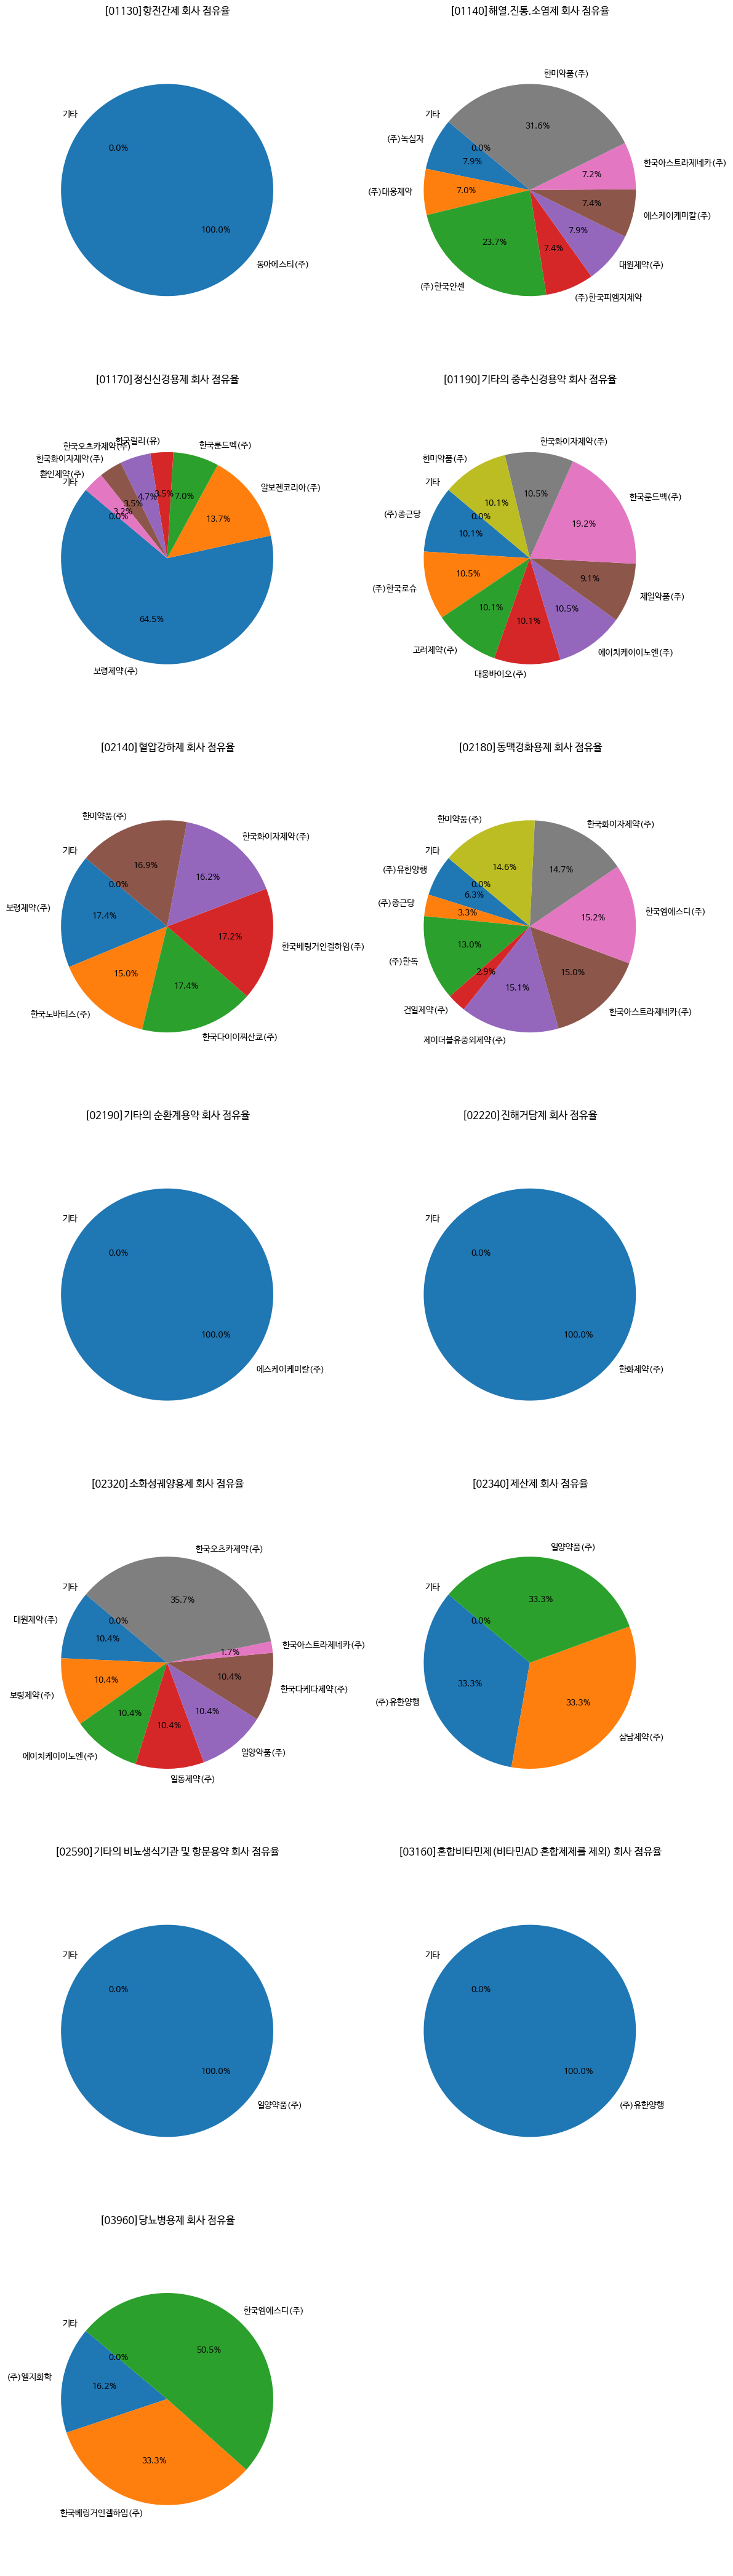

In [ ]:

# 효능별 회사 점유율 파이 차트
class_company = df3.groupby(['di_class_no', 'dl_company']).size().unstack(fill_value=0)

# 1% 이하 비율 회사 "기타"로 묶기
threshold = 0.01
for class_name in class_company.index:
    total = class_company.loc[class_name].sum()
    others = class_company.loc[class_name][class_company.loc[class_name] / total < threshold].sum()
    class_company.loc[class_name] = class_company.loc[class_name][class_company.loc[class_name] / total >= threshold]
    class_company.loc[class_name, '기타'] = others

# 효능별 회사 파이 차트 시각화 (한 줄에 2개씩)
num_classes = len(class_company.index)
num_cols = 2
num_rows = (num_classes + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

for i, class_name in enumerate(class_company.index):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]

    ax.pie(class_company.loc[class_name].dropna(), labels=class_company.columns[class_company.loc[class_name].notna()], autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{class_name} 회사 점유율')
    ax.axis('equal')

# 빈 서브플롯 제거
if num_classes % num_cols != 0:
    fig.delaxes(axes[num_rows - 1, num_cols - 1])

plt.tight_layout()
plt.show()

	약품 시장점유율 고려한 신규진입:
	* 소량판매도 너그러운 시장- 소화성궤양용제, 동맥경화용제, 정신경용제
	* 균형있는 시장- 해열.진통.소염제, 중추신경제, 혈압강화제
	* 반독점 형태로 진입불가- 항전간제, 순환제, 진해거담제, 비뇨생식,항문용, 혼합비타민, 
	* 진입은 가능하나 3, 2점유 체제- 당뇨, 제산제

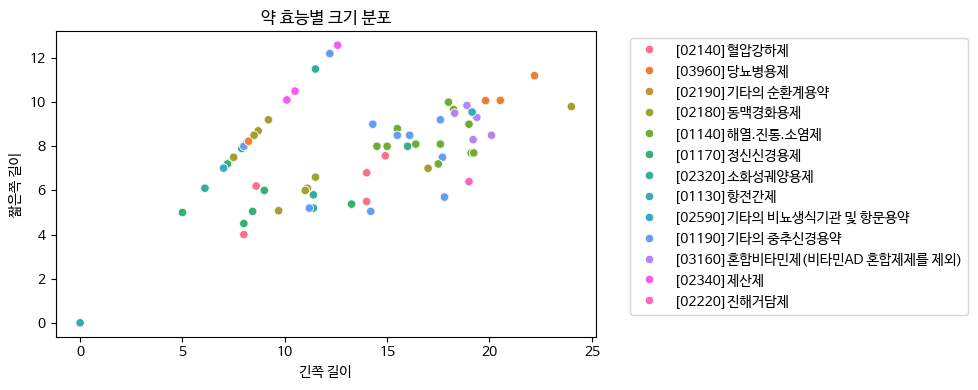

In [100]:
# 2. 약 효능에 따른 제형, 크기, 색상 관계 (약 디자인 트렌드)
class_trends = df3.groupby('di_class_no').agg({
    'color_class1': lambda x: x.mode()[0],  # 최빈 색상
    'thick': 'mean',
    'leng_long': 'mean',
    'leng_short': 'mean'
}).reset_index()
# print("\n약 효능별 디자인 트렌드:\n", class_trends)

plt.figure(figsize=(10, 4))
sns.scatterplot(x='leng_long', y='leng_short', hue='di_class_no', data=df3)
plt.title('약 효능별 크기 분포')
plt.xlabel('긴쪽 길이')
plt.ylabel('짧은쪽 길이')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례를 그래프 바깥으로 이동
plt.tight_layout() # 레이아웃 조정
plt.show()

<Figure size 1200x600 with 0 Axes>

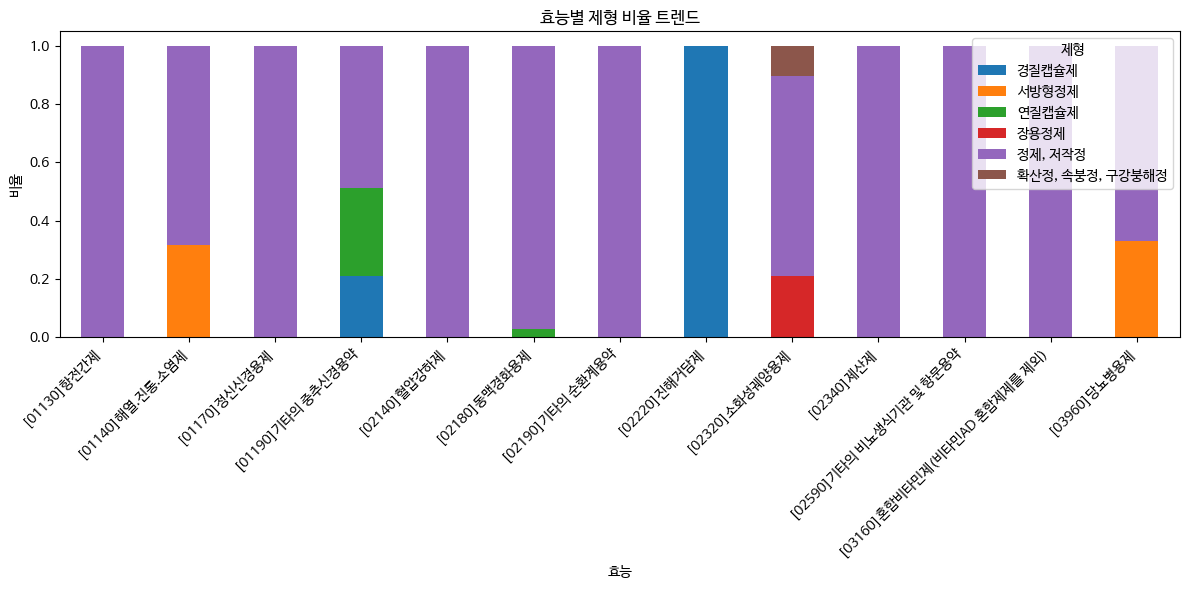

In [125]:

# 효능별 제형 비율 계산
class_shape = df3.groupby(['di_class_no', 'dl_custom_shape']).size().unstack(fill_value=0)
class_shape_ratio = class_shape.div(class_shape.sum(axis=1), axis=0) # 비율 계산

# 효능별 제형 비율 막대 그래프 시각화
plt.figure(figsize=(12, 6))
class_shape_ratio.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('효능별 제형 비율 트렌드')
plt.xlabel('효능')
plt.ylabel('비율')
plt.legend(title='제형')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* 주로 정제로 생산되는 이유

    * 정제와 저작정은 대량 생산 및 유통이 용이하고, 환자 복용 편의성이 높아 널리 사용됩니다.
    * 안정적인 형태와 긴 유통기한, 정확한 용량 제공 등의 장점도 있습니다.

* 예외 사항

    * **진해거담제**: 기침, 가래 완화에 효과적이며, 정확한 용량 투여와 휴대 편의성을 위해 **정제**로 제작됩니다.
    * **해열, 진통, 소염제 및 당뇨병용제**: 쓴맛 차폐와 약물 보호를 위해 **캡슐**로, 지속적인 효과를 위해 서방형 캡슐로 제조됩니다.
    * **소화성궤양용제**: 위 점막 보호 및 빠른 효과를 위해 **액상, 현탁액, 츄어블정** 등 다양한 제형으로 제조됩니다.

# 5.모델 상업활용 방안
    * 노인이나 시각장애인경우 처방 받은후에도 기억하지 못하는 경우, 약품을 식별하여 안내메세지를 음성으로 출력할수있습니다
    * 비전문가인 일반인도 쉽게 부작용을 등록하여 공유하고, 회사도 피드백을 받을수 있습니다. 부작용을 개개인마다 다르고, 임상테스트랑 또 다른 케이스를 찾을수 있습니다.
    * 비전문가인 일반인도 쉽게 생애 복약이력을 기록하고, 복잡한 의료정보시스템을 거치지않고 저장/확인 할수있습니다.
    * 약국, 병원, 온라인 쇼핑몰 등에서 약품 정보 검색을 위한 API를 제공하여 활용도를 높일 수 있습니다.
    * 원격 의료/복약 지도: 원격 의료 상담 시 환자가 복용하는 약품을 정확하게 식별하고 복약 지도를 제공하는 서비스를 개발할 수 있습니다.



# 6.데이터 상업활용 방안 
    * 약품 시장점유율 고려한 신규진입:
        * 소량판매도 너그러운 시장- 소화성궤양용제, 동맥경화용제, 정신경용제
        * 균형있는 시장- 해열.진통.소염제, 중추신경제, 혈압강화제
        * 반독점 형태로 진입불가- 항전간제, 순환제, 진해거담제, 비뇨생식,항문용, 혼합비타민, 
        * 진입은 가능하나 3, 2점유 체제- 당뇨, 제산제

	* 약품 디자인 및 마케팅:
	    * 약품 디자인 트렌드, 시장 점유율 파악하고, 신제품 개발 또는 마케팅 전략 수립에 활용할 수 있습니다.

# 이미지 자료

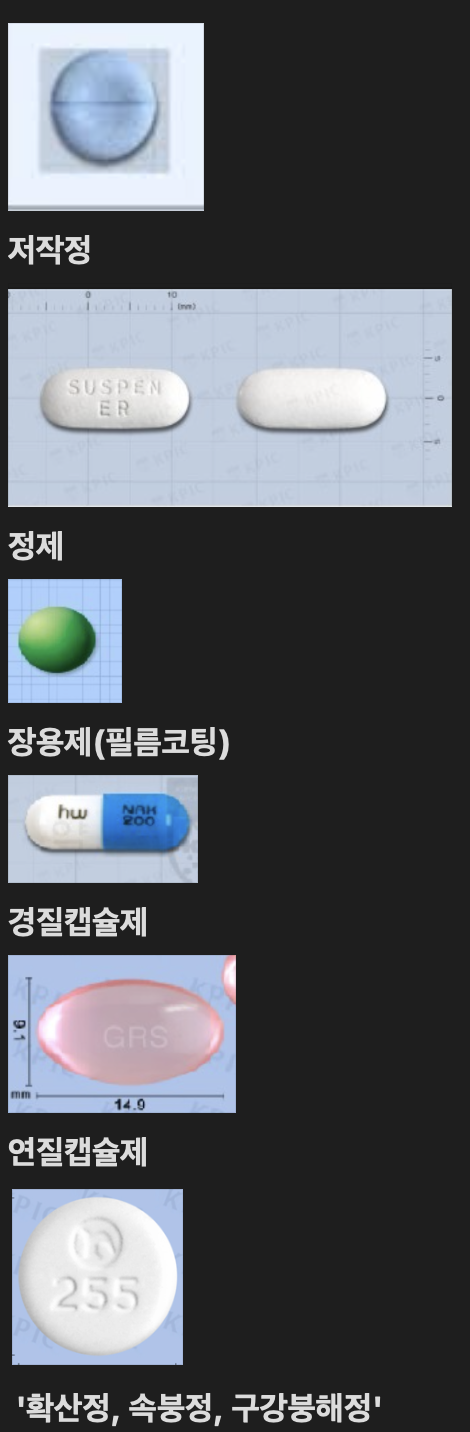

In [ ]:
# 기타 참고

In [ ]:
# 'chart', 'category_name', 'dl_name'으로 그룹화하고 각 그룹의 크기 계산
grouped = df.groupby(['chart', 'category_name', 'dl_name']).size().reset_index(name='count')

# 각 'chart', 'category_name' 조합에 대해 'dl_name'의 고유값 개수 계산
unique_dl_names = df.groupby(['chart', 'category_name'])['dl_name'].nunique().reset_index(name='unique_dl_name_count')

# 'chart', 'category_name' 조합에 대한 일관성 검사
merged = pd.merge(grouped, unique_dl_names, on=['chart', 'category_name'])
inconsistent_pairs = merged[merged['unique_dl_name_count'] > 1]

# 결과 출력
if inconsistent_pairs.empty:
    print("모든 'chart', 'category_name' 조합은 일관된 'dl_name' 쌍을 가집니다.")
else:
    print("일관되지 않은 'chart', 'category_name' 조합:")
    print(inconsistent_pairs)

모든 'chart', 'category_name' 조합은 일관된 'dl_name' 쌍을 가집니다.
